<a href="https://colab.research.google.com/github/TejasviBaddam/Automated-Detection-of-Diabetic-Retinopathy-Using-Convolutional-Neural-Networks-CNN-/blob/main/Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import shutil
from PIL import Image, ImageEnhance, ImageFilter
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
def analyze_images(folder_path):
    image_count = 0
    resolutions = {}
    formats = {}

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            try:
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    image_count += 1

                    resolution = img.size
                    resolutions[resolution] = resolutions.get(resolution, 0) + 1

                    img_format = img.format
                    formats[img_format] = formats.get(img_format, 0) + 1
            except Exception as e:
                print(f"Error processing file {file}: {e}")

    return image_count, resolutions, formats


train_folder = r"/content/drive/MyDrive/dataset/train_images"
test_folder = r"/content/drive/MyDrive/dataset/test_images"

print("Analyzing Training Dataset...")
train_count, train_resolutions, train_formats = analyze_images(train_folder)
print(f"Total Training Images: {train_count}")
print(f"Training Image Resolutions: {train_resolutions}")
print(f"Training Image Formats: {train_formats}")

Analyzing Training Dataset...
Total Training Images: 3662
Training Image Resolutions: {(1050, 1050): 974, (2588, 1958): 533, (2896, 1944): 34, (3216, 2136): 410, (3388, 2588): 141, (1504, 1000): 92, (819, 614): 287, (2416, 1736): 638, (2048, 1536): 351, (1844, 1226): 61, (2144, 1424): 28, (4288, 2848): 52, (1476, 1117): 14, (640, 480): 42, (1467, 1110): 2, (2146, 1764): 1, (474, 358): 2}
Training Image Formats: {'PNG': 3662}


In [5]:
print("\nAnalyzing Testing Dataset...")
test_count, test_resolutions, test_formats = analyze_images(test_folder)
print(f"Total Testing Images: {test_count}")
print(f"Testing Image Resolutions: {test_resolutions}")
print(f"Testing Image Formats: {test_formats}")


Analyzing Testing Dataset...
Total Testing Images: 1928
Testing Image Resolutions: {(1476, 1117): 2, (640, 480): 1403, (2588, 1958): 134, (2416, 1736): 225, (2048, 1536): 28, (2896, 1944): 11, (1050, 1050): 69, (819, 614): 45, (2592, 1944): 6, (768, 576): 2, (1467, 1110): 2, (2146, 1764): 1}
Testing Image Formats: {'PNG': 1928}


In [7]:
def analyze_csv(file_path, dataset_name):
    try:
        data = pd.read_csv(file_path)

        print(f"\nAnalyzing {dataset_name} Dataset Metadata...")
        print(f"Number of Rows: {data.shape[0]}")
        print(f"Number of Columns: {data.shape[1]}")
        print("\nColumn Names:")
        print(data.columns)

        print("\nMissing Values Per Column:")
        print(data.isnull().sum())

        print("\nUnique Values in Each Column:")
        for column in data.columns:
            print(f"{column}: {data[column].nunique()} unique values")

        if 'label' in data.columns or 'diagnosis' in data.columns:  # Assuming the column might be 'label' or 'diagnosis'
            label_column = 'label' if 'label' in data.columns else 'diagnosis'
            print(f"\nDistribution of {label_column} Labels:")
            print(data[label_column].value_counts())

    except Exception as e:
        print(f"Error reading {file_path}: {e}")


train_csv = r"/content/drive/MyDrive/dataset/train.csv"
test_csv = r"/content/drive/MyDrive/dataset/test.csv"

analyze_csv(train_csv, "Training")


Analyzing Training Dataset Metadata...
Number of Rows: 3662
Number of Columns: 2

Column Names:
Index(['id_code', 'diagnosis'], dtype='object')

Missing Values Per Column:
id_code      0
diagnosis    0
dtype: int64

Unique Values in Each Column:
id_code: 3662 unique values
diagnosis: 5 unique values

Distribution of diagnosis Labels:
diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64


In [8]:
analyze_csv(test_csv, "Testing")


Analyzing Testing Dataset Metadata...
Number of Rows: 1928
Number of Columns: 1

Column Names:
Index(['id_code'], dtype='object')

Missing Values Per Column:
id_code    0
dtype: int64

Unique Values in Each Column:
id_code: 1928 unique values


# Visualization 1: Sample Images for Each Class

Class 0: 1805 samples


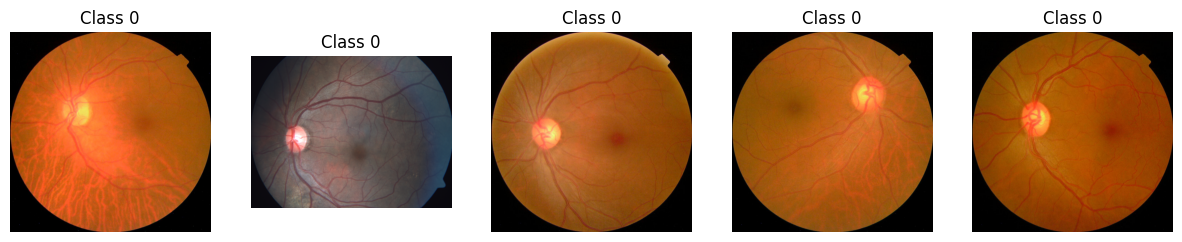

Class 1: 370 samples


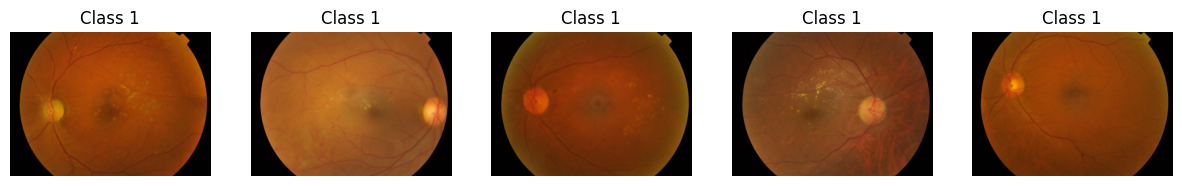

Class 2: 999 samples


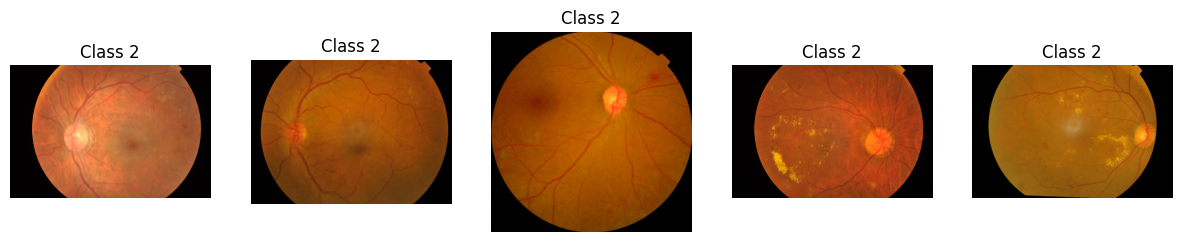

Class 3: 193 samples


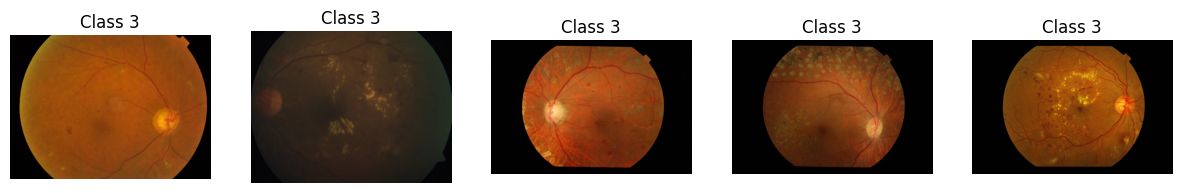

Class 4: 295 samples


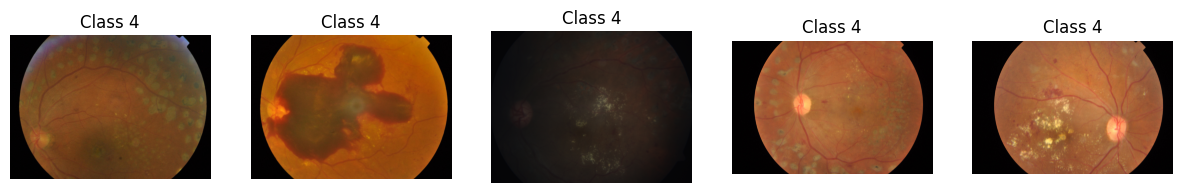

In [10]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Visualize sample images for each class
def visualize_samples(folder_path, csv_path, num_samples=5):
    import pandas as pd
    data = pd.read_csv(csv_path)
    diagnosis_groups = data.groupby('diagnosis')

    for diagnosis, group in diagnosis_groups:
        print(f"Class {diagnosis}: {len(group)} samples")
        sample_ids = group['id_code'].sample(num_samples, random_state=42).values
        plt.figure(figsize=(15, 5))
        for i, sample_id in enumerate(sample_ids):
            file_path = os.path.join(folder_path, f"{sample_id}.png")
            if os.path.exists(file_path):
                img = Image.open(file_path)
                plt.subplot(1, num_samples, i + 1)
                plt.imshow(img)
                plt.title(f"Class {diagnosis}")
                plt.axis('off')
        plt.show()

visualize_samples(train_folder, train_csv)


# Visualization 2: Class Distribution in Training Data



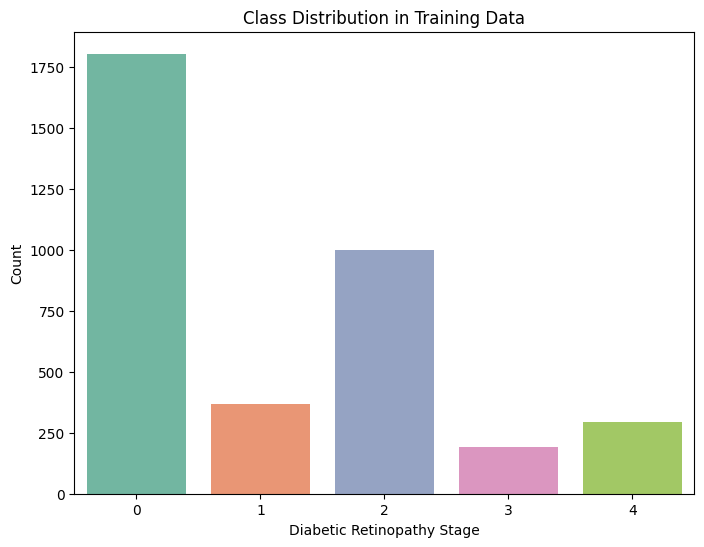

In [13]:
# Load training CSV
data = pd.read_csv(train_csv)

plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', hue='diagnosis', data=data, palette='Set2', legend=False)
plt.title("Class Distribution in Training Data")
plt.xlabel("Diabetic Retinopathy Stage")
plt.ylabel("Count")
plt.show()

# Visualization 3: Image Resolution Distribution



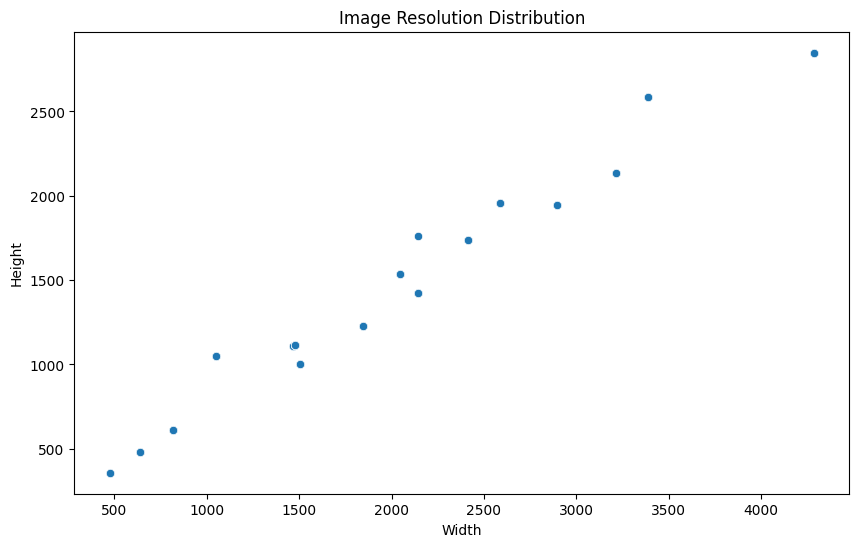

Image Resolution Summary:
             Width       Height
count  3662.000000  3662.000000
mean   2015.176679  1526.830147
std     884.301940   542.663120
min     474.000000   358.000000
25%    1050.000000  1050.000000
50%    2144.000000  1536.000000
75%    2588.000000  1958.000000
max    4288.000000  2848.000000


In [14]:
def image_statistics(folder_path):
    from PIL import Image
    resolutions = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            try:
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    resolutions.append(img.size)
            except Exception as e:
                print(f"Error processing file {file}: {e}")

    return resolutions

# Analyze training images
resolutions = image_statistics(train_folder)
resolution_df = pd.DataFrame(resolutions, columns=['Width', 'Height'])

# Plot resolution distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Width', y='Height', data=resolution_df)
plt.title("Image Resolution Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

# Summary statistics of resolutions
print("Image Resolution Summary:")
print(resolution_df.describe())

# Visualization 4: Displaying grayscale images by diagnosis



Displaying grayscale images by diagnosis (256x256)...


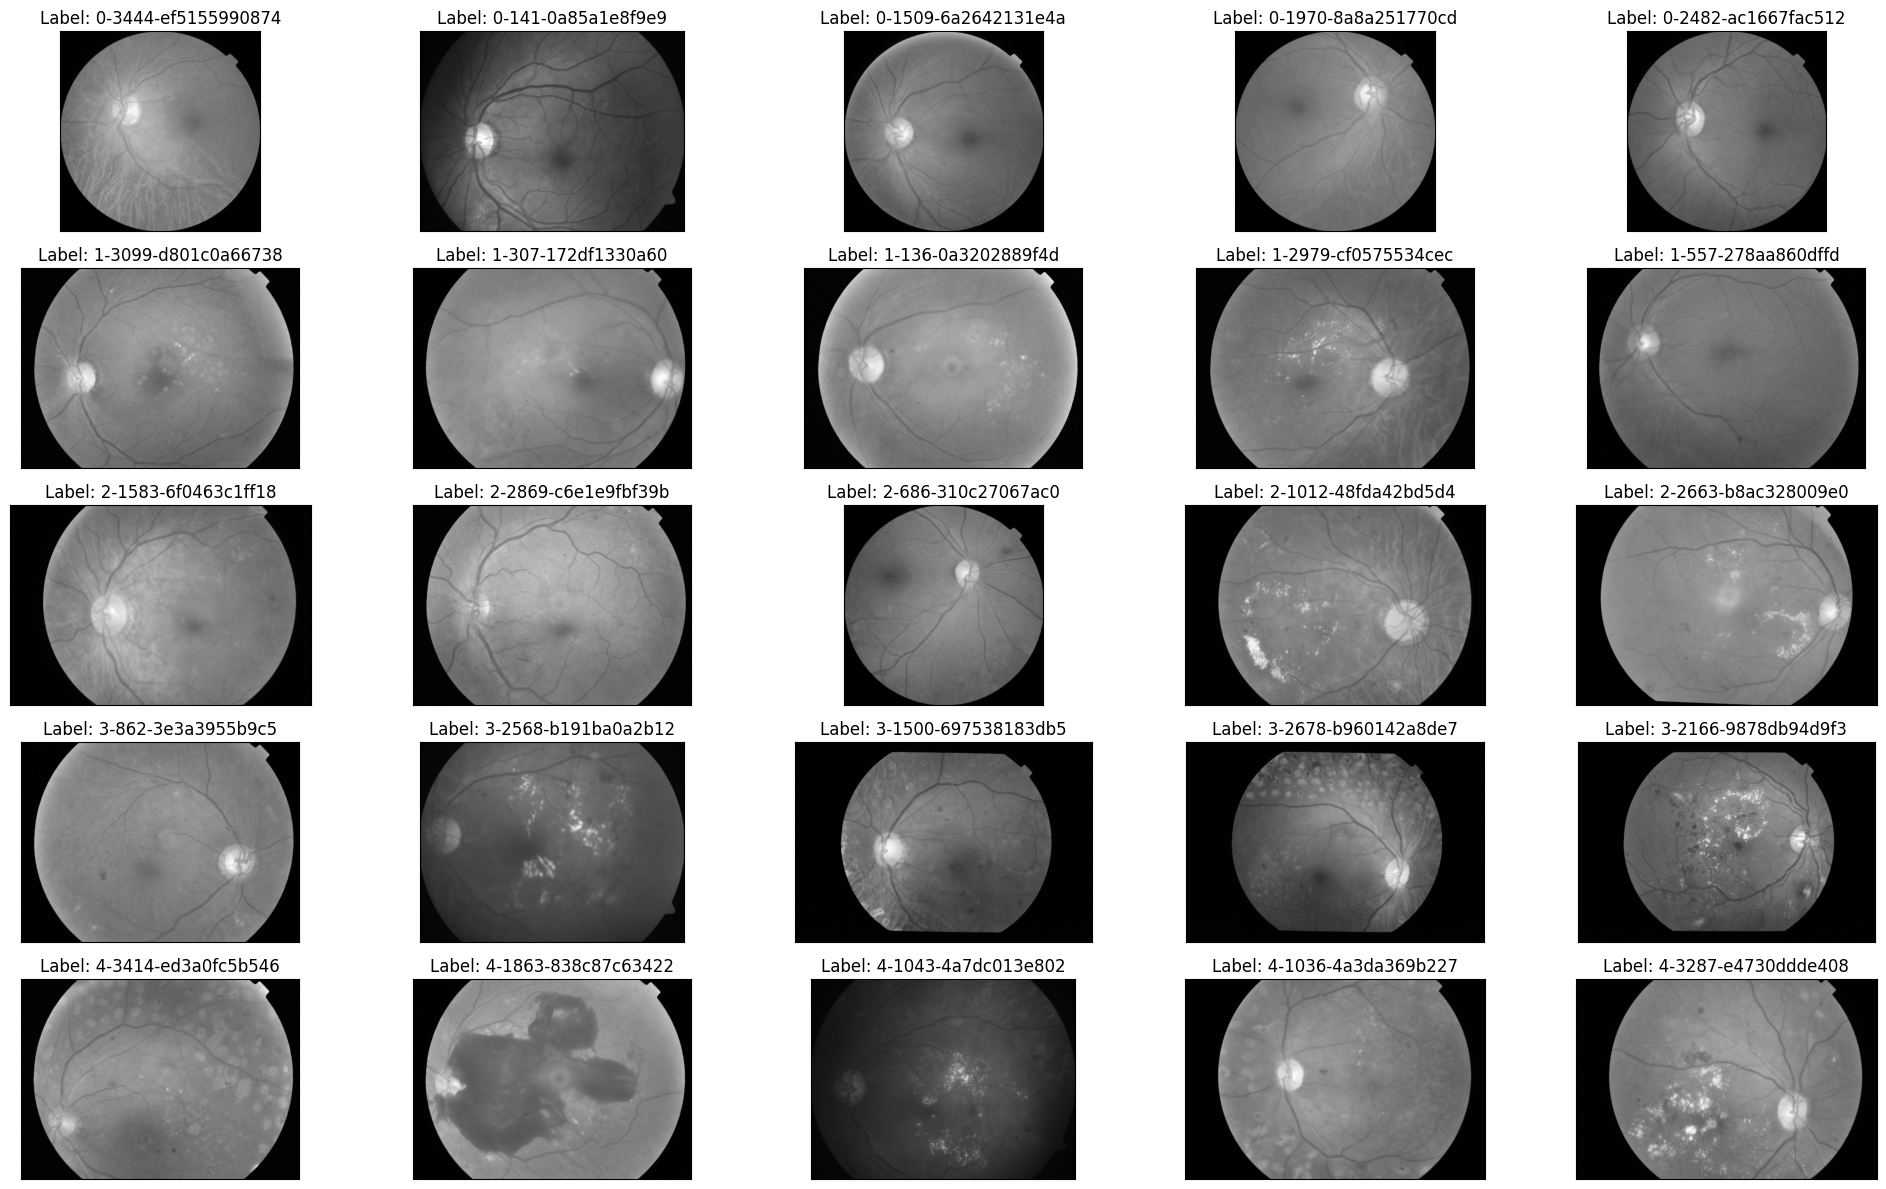

In [23]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt


train_csv_path = r"/content/drive/MyDrive/dataset/train.csv"
train_images_path = r"/content/drive/MyDrive/dataset/train_images"

train = pd.read_csv(train_csv_path)

def display_images_by_severity(df, images_path, grayscale=False):
    """
    Display images grouped by diagnosis (severity) in a grid.
    Args:
        df (pd.DataFrame): DataFrame containing image metadata.
        images_path (str): Path to the folder containing images.
        grayscale (bool): If True, display images in grayscale. Default is False (color).
    """
    fig = plt.figure(figsize=(20, 12))
    for class_id in sorted(df['diagnosis'].unique()):
        for i, (idx, row) in enumerate(df.loc[df['diagnosis'] == class_id].sample(5, random_state=42).iterrows()):
            ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
            path = os.path.join(images_path, f"{row['id_code']}.png")
            image = cv2.imread(path)
            if image is not None:
                if grayscale:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    ax.imshow(image, cmap='gray')
                else:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib
                    ax.imshow(image)
                ax.set_title(f'Label: {class_id}-{idx}-{row["id_code"]}')
            else:
                ax.axis('off')
                ax.set_title(f'Missing Image')
    plt.tight_layout()
    plt.show()
# Display grayscale images by diagnosis
print("Displaying grayscale images by diagnosis (256x256)...")
display_images_by_severity(train, train_images_path, grayscale=True)
